<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/Batch_normalization_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization 
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                160       
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 3)                 51        
                                                                 
Total params: 739
Trainable params: 739
Non-trainable params: 0
_________________________________________________________________


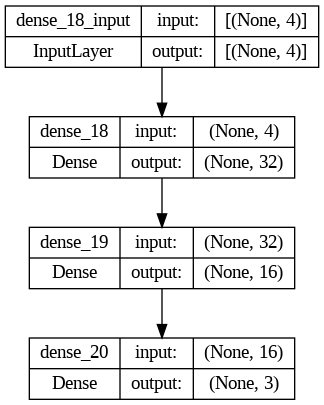

In [22]:
# seed the random generator for reproducibility
random.seed(42)

# load and preprocess you dataset
iris = load_iris()
x    = iris.data
y    = iris.target
num_classes = len(np.unique(y))

scalar = MinMaxScaler()
xn = scalar.fit_transform(x)

xtrain, xtest, y_train, y_test = train_test_split(xn, y, test_size=0.2, random_state=42, stratify=y)

ytrain = to_categorical(y_train, num_classes=num_classes)
ytest = to_categorical(y_test, num_classes=num_classes)

# Define a simple neural network with BatchNormalization layers
model = Sequential([
    Dense(32, activation='relu', input_shape=[4]),
    #BatchNormalization(),
    Dense(16, activation='relu'),
    #BatchNormalization(),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])  #adam

# visualize your model
model.summary()
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [23]:
epochs = 200
import time
t1 = time.perf_counter()

history = model.fit(xtrain, ytrain, epochs=epochs, validation_split=0.1, batch_size=16, verbose=0)

t2 = time.perf_counter()
print('time taken to run:',t2-t1)


time taken to run: 12.717748541999754


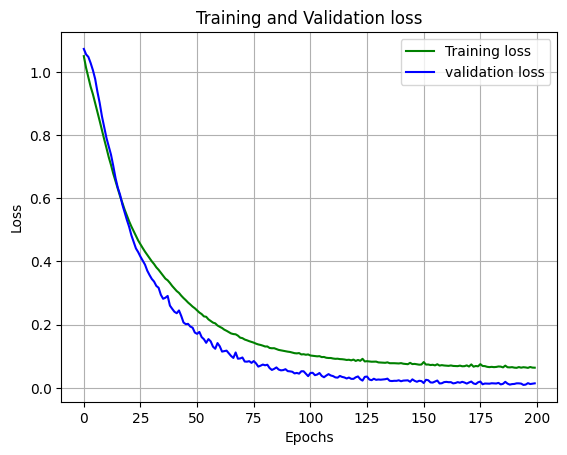

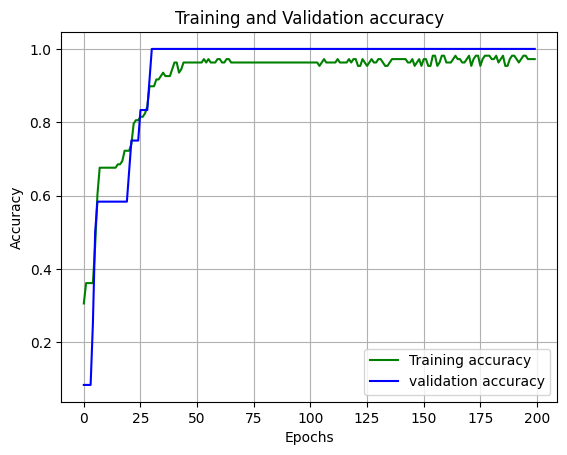

In [24]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(0,epochs)
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
ypred=model.predict(xtest)
# convert outputs back from one hot encoding
ypred= np.argmax(ypred, axis=1)  #.numpy()
cm = confusion_matrix(y_test, ypred)
print(cm)
print(classification_report(y_test, ypred))

1/1 [==============================] - 0s 75ms/step
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

